In [1]:
# Run this cell in the beginning
# Required to import other code in the repository
import project_path

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

%matplotlib inline

from utils import miccai, visualize

In [3]:
sample = "../data/miccai/train/0522c0017/"

patient = miccai.Patient(sample)
patient.meta_data

{'image': '../data/miccai/train/0522c0017/img.nrrd',
 'structures': {'BrainStem': '../data/miccai/train/0522c0017/structures/BrainStem.nrrd',
  'Chiasm': '../data/miccai/train/0522c0017/structures/Chiasm.nrrd',
  'Mandible': '../data/miccai/train/0522c0017/structures/Mandible.nrrd',
  'OpticNerve_L': '../data/miccai/train/0522c0017/structures/OpticNerve_L.nrrd',
  'OpticNerve_R': '../data/miccai/train/0522c0017/structures/OpticNerve_R.nrrd',
  'Parotid_L': '../data/miccai/train/0522c0017/structures/Parotid_L.nrrd',
  'Parotid_R': '../data/miccai/train/0522c0017/structures/Parotid_R.nrrd',
  'Submandibular_L': '../data/miccai/train/0522c0017/structures/Submandibular_L.nrrd',
  'Submandibular_R': '../data/miccai/train/0522c0017/structures/Submandibular_R.nrrd'},
 'landmarks': '../data/miccai/train/0522c0017/Landmarks_0017.fcsv'}

In [4]:
patient.image

Volume(path=../data/miccai/train/0522c0017/img.nrrd)

In [5]:
patient.structures.Parotid_L

Volume(path=../data/miccai/train/0522c0017/structures/Parotid_L.nrrd)

In [6]:
patient.num_slides

156

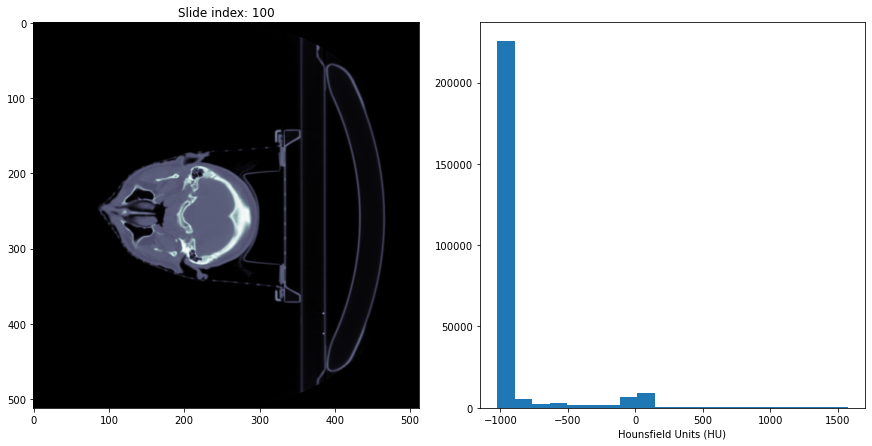

In [7]:
_ = visualize.plot_slide(patient, index=100)

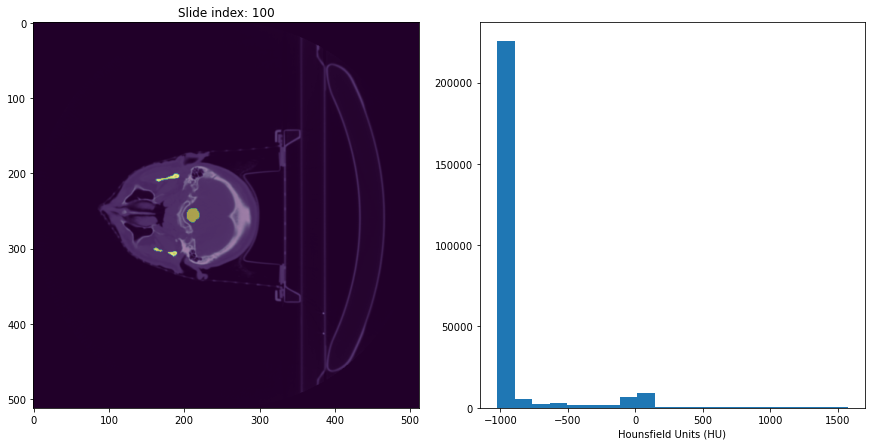

In [8]:
_ = visualize.plot_slide(patient, index=100, region=["Mandible", "BrainStem"])

In [9]:
_ = visualize.notebook_interact(patient)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=155), SelectMultipl…

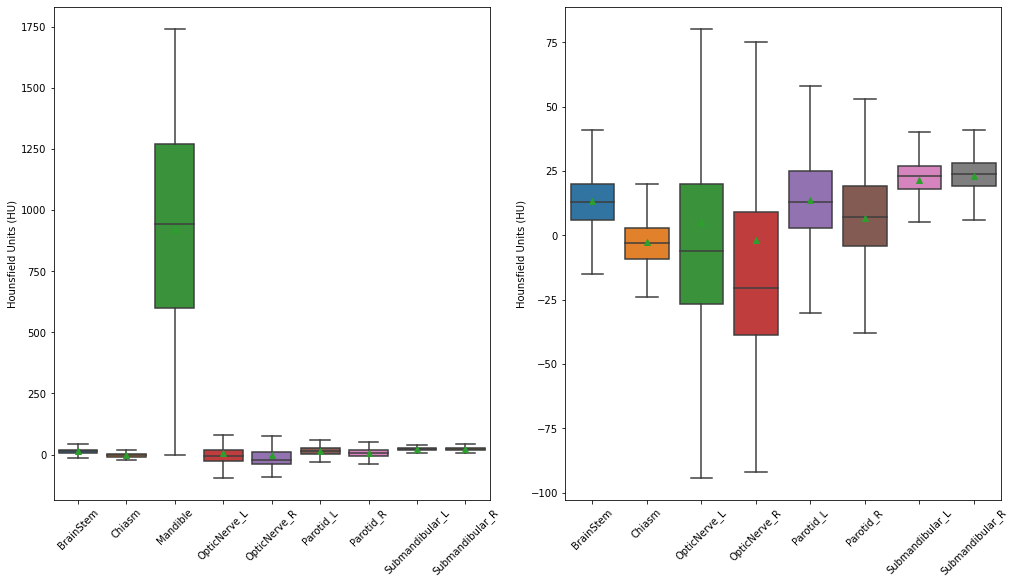

In [10]:
fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(14, 8))

_ = visualize.plot_region_distribution(patient, ax=axes[0])
_ = visualize.plot_region_distribution(patient, exclude=["Mandible"], ax=axes[1])

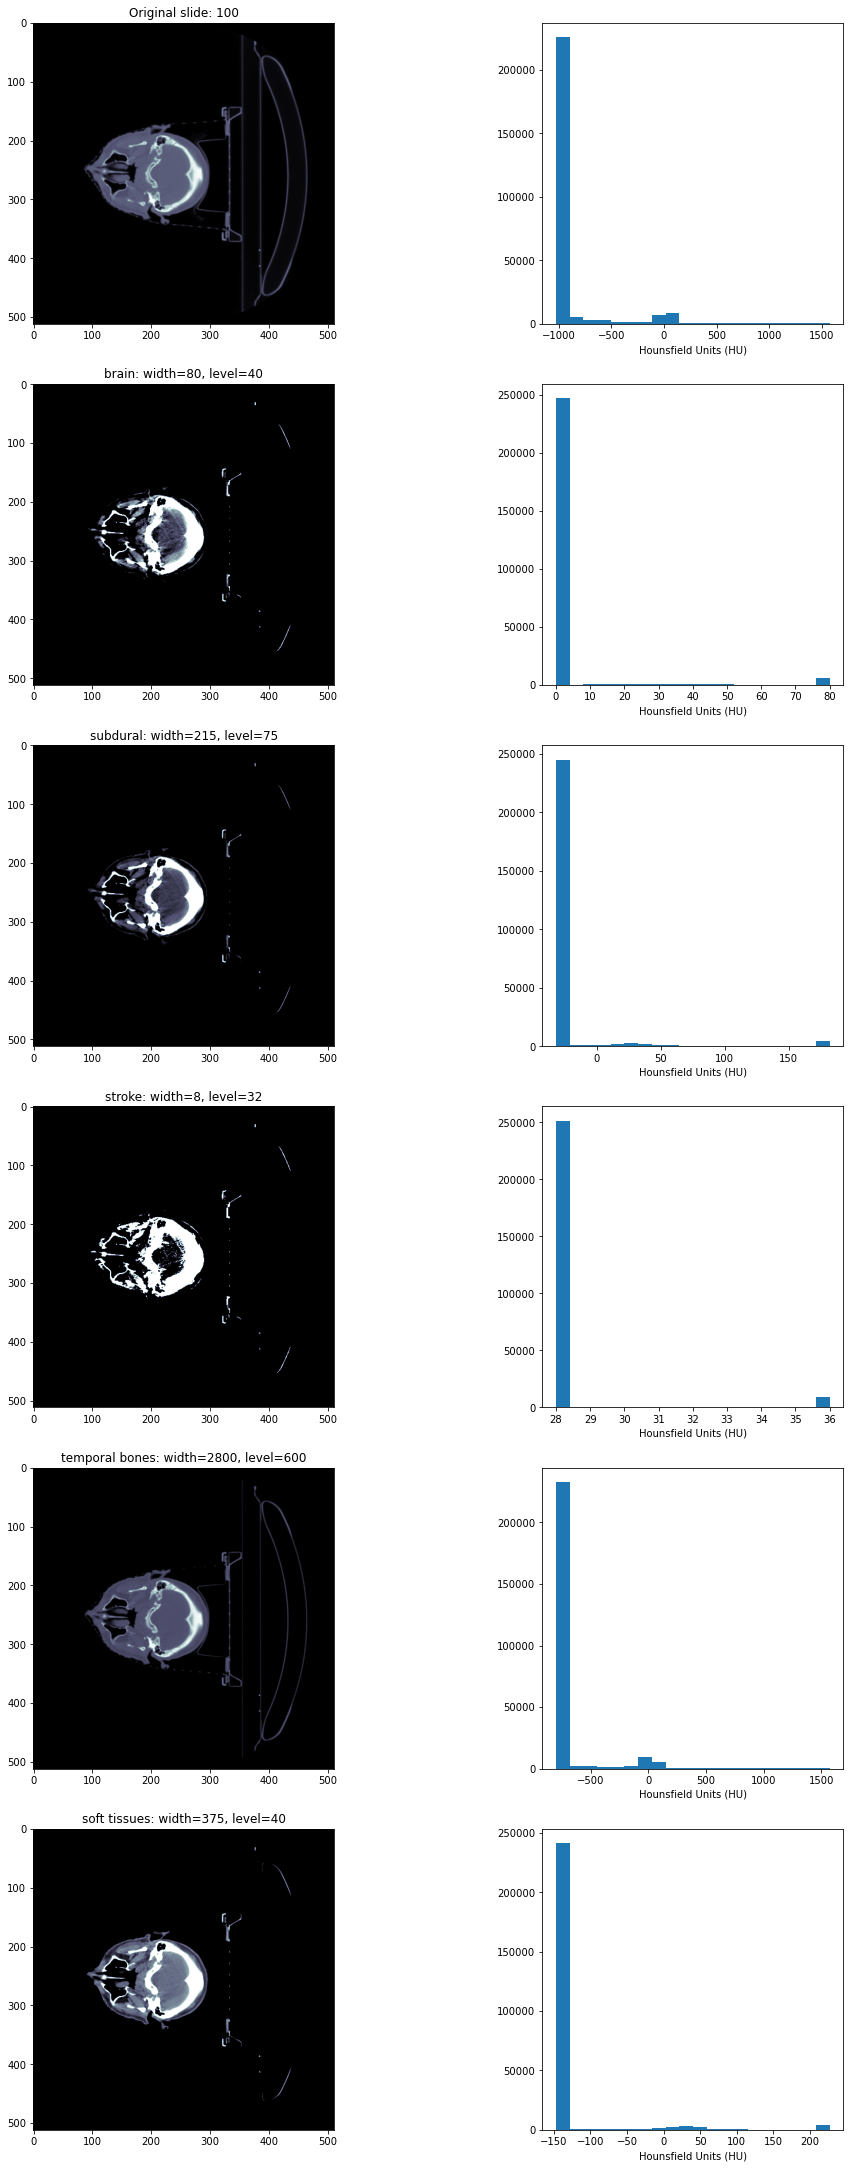

In [11]:
_ = visualize.plot_windowed(patient, index=100)

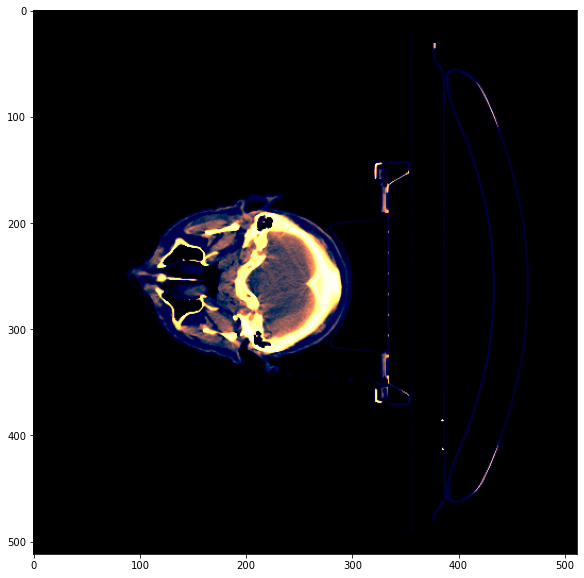

In [12]:
index = 100

combined_volume = np.zeros((*patient.image.as_numpy()[0][index].shape, 3))
combined_volume[:, :, 0] = visualize._window_volume(patient, 80, 40)[0][index]
combined_volume[:, :, 1] = visualize._window_volume(patient, 215, 75)[0][index]
combined_volume[:, :, 2] = visualize._window_volume(patient, 2800, 600)[0][index]

min_ = combined_volume.min(axis=(0, 1), keepdims=True)
max_ = combined_volume.max(axis=(0, 1), keepdims=True)

combined_volume = (combined_volume - min_) / (max_ - min_)

plt.figure(figsize=(10, 10))
plt.imshow(combined_volume)
plt.show()